# Complexity of iterated grid-search methodology
for the optimization of weights given to relative variables in analog methods.

This notebook accompanies the following publication:
Paul Platzer, Arthur Avenas, Bertrand Chapron, Lucas Drumetz, Alexis Mouche, Léo Vinour. Distance Learning for Analog Methods. 2024. [⟨hal-04841334⟩](https://hal.science/hal-04841334)

This notebook is used to estimate the number of times one must perform the analog ensemble method over the whole dataset in the iterative method of Alessandrini et al. (2018), in order to optimize the weights given to input variables in the definition of the distance used to find and rate analogs. This method follows several steps.

1. The first step is to test the analog forecasting scheme with only one input variable, which is given a weight of "1". This first step requires testing the analog method $p$ times over the whole dataset, where $p$ is the number of possible input variables. The variable which allows for the best performances is then kept for the second step.

2. In the second step, all possible remaining ($p-1$) variables are tested in addition to the variable selected in the first step. In addition, for each new variable, all possible sum-1 combinations of weights with values in the set $\lbrace 0, 0.1, 0.2, \ldots, 0.9, 1 \rbrace$ are tested. There are exactly 11 possibilities for such weight combinations. This step therefore requires testing the analog method $11(p-1)$ times over the whole dataset. Then, the choice of new variable and weights which provides the best score is retained.

3. In the third step, we add again one variable out of the $(p-2)$ remaining non-selected variables. This time and for each possible new variable, all possible combination of three sum-1 weights in the set $\lbrace 0, 0.1, 0.2, \ldots, 0.9, 1 \rbrace$ are tested. There are exactly 66 of them. In general, there are exactly $\binom{10+n-1}{n-1}$ possible choices for $n$ sum-1 weights that are all in the set $\lbrace 0, 0.1, 0.2, \ldots, 0.9, 1 \rbrace$. Therefore, step 3 requires testing the analog method $66(p-2)$ times over the whole dataset.

To summarize, step $n$ of this algorithm requires testing the analog method $N_{comb}(p,n)$ times over the whole dataset where we have:

$$ N_{comb}(p,n) := (p-n+1) \binom{10+n-1}{n-1} $$

For instance $N_{comb}(16,3) = 924$ and  $N_{comb}(16,4) = 3718$. The total number of times one must test the analog method over the entire training dataset in order to find $n$ non-zero optimal weights over $p$ possible input variables using this methodology is $N_{tests}(p,n)$ which follows:

$$N_{tests}(p,n) := \sum_{m=1}^n N_{comb}(p,m) = \sum_{m=1}^n (p-m+1) \binom{10+m-1}{m-1} $$

In [1]:
import numpy as np
from scipy.special import binom
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.rcParams.update({'font.size': 14})

In [3]:
cols = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

In [74]:
def Ncomb( p , n ):
    Ncomb = ( p - n + 1 ) * binom( 10 + n - 1, n - 1 ) 
    if Ncomb <= 0:
        Ncomb = np.nan
    return Ncomb

In [75]:
def Ntest( p , n ):
    Ntest = 0
    for m in range(1,n+1):
        Ntest += Ncomb( p , m )
    return Ntest

In [76]:
Ntest( 16 , 10 )

1301690.0

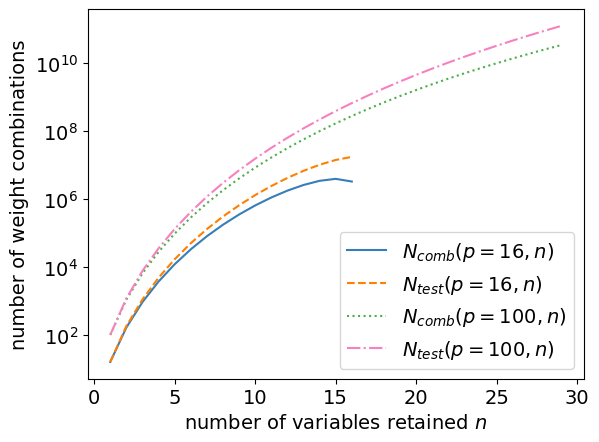

In [84]:
n = np.arange(1, 30)
plt.figure()
pp = [16,100]
for i_p in range(len(pp)):
    p = pp[i_p]
    Nc = np.zeros(len(n))
    Nt = np.zeros(len(n))
    for i in range(len(n)):
        Nc[i] = Ncomb( p , n[i] )
        Nt[i] = Ntest( p , n[i] )
    plt.plot( n, Nc, label=r'$N_{comb}(p=$'+str(p)+r'$,n)$', color=cols[2*i_p], ls=(['-','--',':','-.']*4)[2*i_p] )
    plt.plot( n, Nt, label=r'$N_{test}(p=$'+str(p)+r'$,n)$', color=cols[2*i_p+1], ls=(['-','--',':','-.']*4)[2*i_p+1] )
plt.legend()
plt.yscale('log')
plt.xlabel(r'number of variables retained $n$')
plt.ylabel('number of weight combinations')
plt.show()